In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv("/kaggle/input/salary/nasdaq100.csv", sep=";")
df.head()


,Date,Starting (USD),Ending (USD)
0,01.01.24,16800,16500
1,01.12.23,15900,16100
2,01.11.23,15800,15300
3,01.10.23,16100,16200
4,01.09.23,16300,15700


In [3]:
df.isnull().sum()

Date              0
Starting (USD)    0
Ending (USD)      0
dtype: int64

In [4]:
df=df.drop(columns=['Date'])
df.head()

,Starting (USD),Ending (USD)
0,16800,16500
1,15900,16100
2,15800,15300
3,16100,16200
4,16300,15700


Text(0.5, 1.0, 'salary')

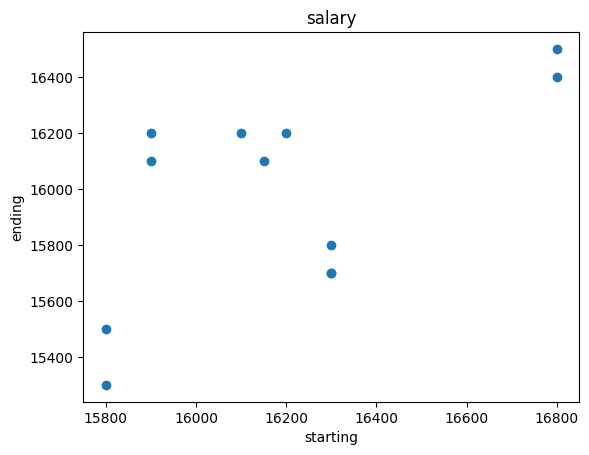

In [5]:
plt.scatter(df['Starting (USD)'], df['Ending (USD)'])
plt.xlabel('starting')
plt.ylabel('ending')
plt.title('salary')

In [6]:
y=df['Ending (USD)']
x=df.drop('Ending (USD)', axis=1)

In [7]:
from sklearn.linear_model import LinearRegression


In [8]:
reg=LinearRegression()

Text(0.5, 1.0, 'salary')

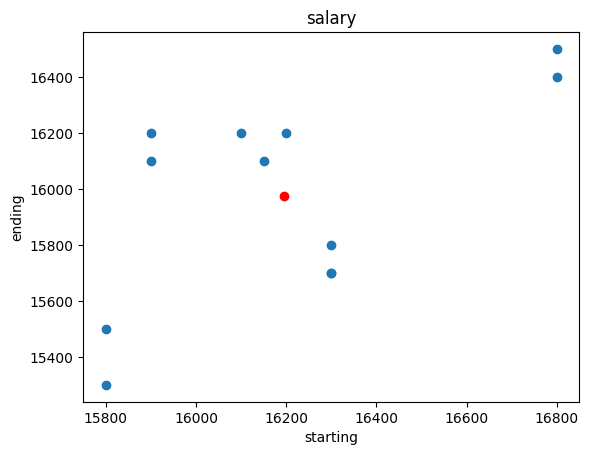

In [9]:
plt.scatter(x.mean(), y.mean(), color='red')
plt.scatter(df['Starting (USD)'], df['Ending (USD)'])
plt.xlabel('starting')
plt.ylabel('ending')
plt.title('salary')

In [10]:
reg.fit(x,y)

LinearRegression()

In [11]:
m=reg.coef_
c=reg.intercept_ #which point cross the y axis this slope
m*16700+c


array([16304.0105628])

In [12]:
# another way to predict
reg.predict([[16700]])

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([16304.0105628])

In [13]:
df['predict_y']=reg.predict(x)
df

,Starting (USD),Ending (USD),predict_y
0,16800,16500,16369.268856
1,15900,16100,15781.944215
2,15800,15300,15716.685922
3,16100,16200,15912.460802
4,16300,15700,16042.977389
5,16800,16400,16369.268856
6,15900,16200,15781.944215
7,15800,15500,15716.685922
8,16150,16100,15945.089949
9,16300,15800,16042.977389


Text(0.5, 1.0, 'salary')

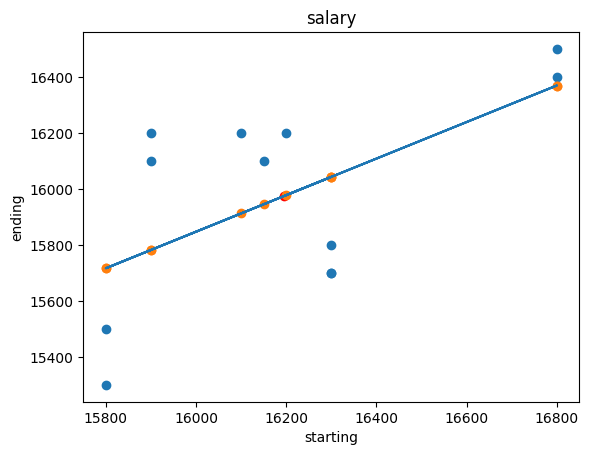

In [14]:
plt.plot(x,reg.predict(x))
#check
plt.scatter(x.mean(), y.mean(), color='red')
plt.scatter(df['Starting (USD)'], df['Ending (USD)'])
plt.scatter(df['Starting (USD)'], reg.predict(x))
plt.xlabel('starting')
plt.ylabel('ending')
plt.title('salary')

In [15]:
# error calculation mse
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(df['Ending (USD)'], df['predict_y'])
mse

80411.23397700385

In [16]:
reg.score(x,y)

0.3577804940272571